In [ ]:
import kagglehub

path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:35<00:00, 1.78MB/s]

Extracting files...


Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\msambare\fer2013\versions\1


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path dataset
train_dir = r"C:\Machine Learning\projek dojo\datasets\msambare\fer2013\versions\1\train"
test_dir = r"C:\Machine Learning\projek dojo\datasets\msambare\fer2013\versions\1\test"
# Augmentasi data (opsional untuk meningkatkan variasi data)
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalisasi pixel 0-1
    rotation_range=20,    # Rotasi gambar max 20 derajat
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Data uji hanya dinormalisasi

# Load data dari folder
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),  # Resize ke 48x48 px
    batch_size=32,
    color_mode="grayscale",  # Ubah ke grayscale biar lebih ringan
    class_mode='categorical'  # Karena klasifikasi multi-kelas
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size=32,
    color_mode="grayscale",
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


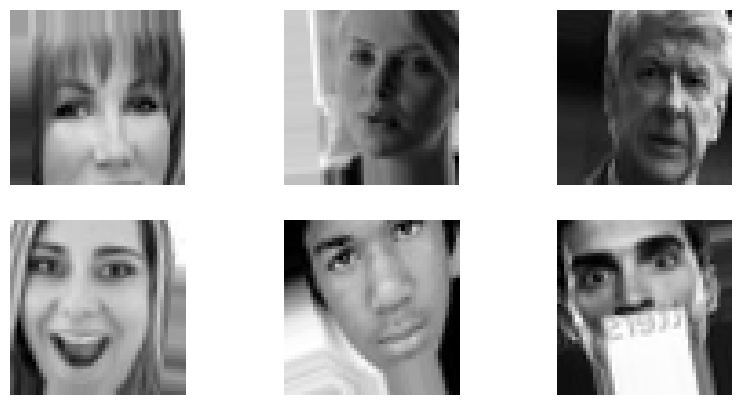

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch gambar & label
# Ambil satu batch gambar & label
x_batch, y_batch = train_data.__next__()


# Tampilkan beberapa gambar contoh
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_batch[i].reshape(48,48), cmap="gray")
    plt.axis("off")
plt.show()


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Arsitektur CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout untuk menghindari overfitting
    Dense(7, activation='softmax')  # 7 kelas (angry, disgust, fear, happy, neutral, sad, surprise)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Lihat struktur model
model.summary()


C:\Users\ASUS\anaconda3\envs\mediapipe_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_data,
    epochs=45,
    validation_data=test_data
)


Epoch 1/45


C:\Users\ASUS\anaconda3\envs\mediapipe_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.2336 - loss: 1.8304 - val_accuracy: 0.2508 - val_loss: 1.7824
Epoch 2/45
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.2563 - loss: 1.7874 - val_accuracy: 0.2889 - val_loss: 1.7175
Epoch 3/45
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.2725 - loss: 1.7516 - val_accuracy: 0.3242 - val_loss: 1.6784
Epoch 4/45
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.3053 - loss: 1.7126 - val_accuracy: 0.3863 - val_loss: 1.5897
Epoch 5/45
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.3343 - loss: 1.6620 - val_accuracy: 0.4443 - val_loss: 1.4619
Epoch 6/45
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.3686 - loss: 1.6000 - val_accuracy: 0.4492 - val_loss: 1.4416
Epoch 7/45
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.3963 - loss: 1.5471 - val_accuracy: 0.4714 - val_loss: 1.3753
Epoch 8/45
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.4138 - loss: 1.5100 - val_accurac

In [13]:
model.save("model_ekspresi.h5")


In [14]:
# evaluasi model dengan data test

loss, acc = model.evaluate(test_data)
print(f"Akurasi Model: {acc:.2%}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5653 - loss: 1.1450
Akurasi Model: 56.74%


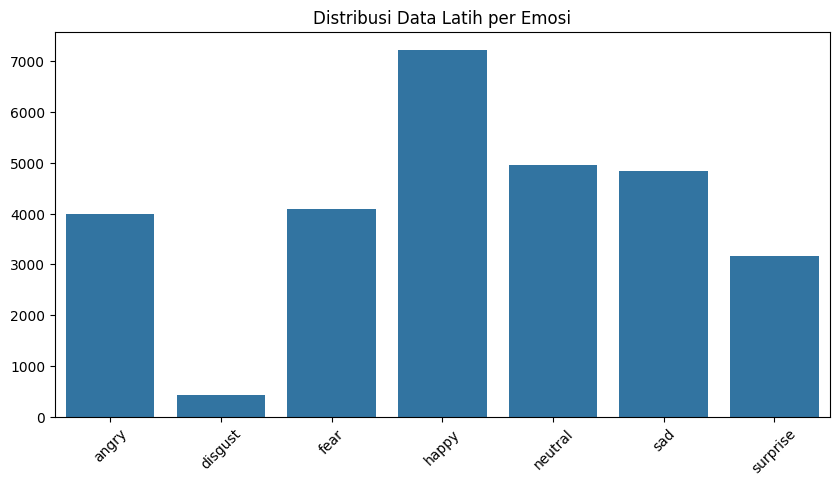

In [11]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

train_dir = "C:/Machine Learning/projek dojo/datasets/msambare/fer2013/versions/1/train"

# Hitung jumlah gambar di setiap kelas
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}

# Plot distribusi kelas
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Distribusi Data Latih per Emosi")
plt.xticks(rotation=45)
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------------


In [2]:
import albumentations as A
import cv2
import numpy as np
import os

# 📌 Pipeline augmentasi
augment = A.Compose([
    A.Rotate(limit=20),  # Rotasi hingga 20 derajat
    A.HorizontalFlip(p=0.5),  # Flip horizontal 50% dari gambar
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=20, p=0.5),
    A.RandomBrightnessContrast(p=0.2)  # Atur kecerahan & kontras
])

# 📌 Folder dataset asli & tempat menyimpan hasil
input_folder = "C:/Machine Learning/projek dojo/datasets/msambare/fer2013/versions/1/train/happy"  
output_folder = "C:/Machine Learning/projek dojo/datasets/augmented/happy"

# Buat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# 📌 Loop semua gambar & augmentasi
for img_name in os.listdir(input_folder):
    img_path = os.path.join(input_folder, img_name)
    img = cv2.imread(img_path)

    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Pastikan format warna benar
        
        # Ulangi augmentasi beberapa kali biar makin banyak variasi
        for i in range(5):  # Ganti 5 kalau mau lebih banyak augmentasi per gambar
            augmented = augment(image=img)['image']  
            
            output_path = os.path.join(output_folder, f"aug_{i}_{img_name}")
            cv2.imwrite(output_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))  


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path dataset
train_dir = "C:/Machine Learning/projek dojo/datasets/augmented"
test_dir = "C:/Machine Learning/projek dojo/datasets/msambare/fer2013/versions/1/test"
# Augmentasi data (opsional untuk meningkatkan variasi data)
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalisasi pixel 0-1
    rotation_range=20,    # Rotasi gambar max 20 derajat
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Data uji hanya dinormalisasi

# Load data dari folder
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),  # Resize ke 48x48 px
    batch_size=32,
    color_mode="grayscale",  # Ubah ke grayscale biar lebih ringan
    class_mode='categorical'  # Karena klasifikasi multi-kelas
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size=32,
    color_mode="grayscale",
    class_mode='categorical'
)


Found 36075 images belonging to 1 classes.
Found 7178 images belonging to 7 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # 7 kelas untuk FER2013
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\ASUS\anaconda3\envs\mediapipe_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("model_ekspresi_wajah.h5")
